In [152]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [153]:
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables


In [154]:
# Model 1 has all categorical variables
from sklearn.compose import ColumnTransformer

penguins = penguins.dropna()

ct1 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["species", "island", "sex"])
  ],
  remainder = "drop"
)


lr_pipeline_1 = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

lr_pipeline_1

y = penguins["bill_depth_mm"]
X = penguins[["species", "island", "sex"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_pipeline_fitted = lr_pipeline_1.fit(X_train, y_train)
y_preds_1 = lr_pipeline_fitted.predict(X_test)

p1r2 = r2_score(y_test, y_preds_1)
p1r2

0.7938582507850175

In [155]:
# Model 2 has only bill_length_mm and species
penguins = penguins.dropna()
ct2 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["species"]),
    ("standardize", StandardScaler(), ["bill_length_mm"])
  ],
  remainder = "drop"
)


lr_pipeline_2 = Pipeline(
  [("preprocessing", ct2),
  ("linear_regression", LinearRegression())]
)

lr_pipeline_2

y = penguins["bill_depth_mm"]
X = penguins[["bill_length_mm", "species"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_pipeline_fitted = lr_pipeline_2.fit(X_train, y_train)
y_preds_2 = lr_pipeline_fitted.predict(X_test)

p2r2 = r2_score(y_test, y_preds_2)
p2r2

0.7771098719615612

In [156]:
# Model 3 has all standardized variables
penguins = penguins.dropna()
ct3 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"])
  ],
  remainder = "drop"
)


lr_pipeline_3 = Pipeline(
  [("preprocessing", ct3),
  ("linear_regression", LinearRegression())]
)

lr_pipeline_3

y = penguins["bill_depth_mm"]
X = penguins[["bill_length_mm", "flipper_length_mm", "body_mass_g"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_pipeline_fitted = lr_pipeline_3.fit(X_train, y_train)
y_preds_3 = lr_pipeline_fitted.predict(X_test)

p3r2 = r2_score(y_test, y_preds_3)
p3r2

0.4138541411119433

In [157]:
# Model 4 has all predictor variables
penguins = penguins.dropna()
ct4 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"]),
    ("dummify", OneHotEncoder(sparse_output = False), ["species", "island", "sex"])
  ],
  remainder = "drop"
)


lr_pipeline_4 = Pipeline(
  [("preprocessing", ct4),
  ("linear_regression", LinearRegression())]
)

lr_pipeline_4

y = penguins["bill_depth_mm"]
X = penguins[["species", "island", "sex", "bill_length_mm", "flipper_length_mm", "body_mass_g"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_pipeline_fitted = lr_pipeline_4.fit(X_train, y_train)
y_preds_4 = lr_pipeline_fitted.predict(X_test)

p4r2 = r2_score(y_test, y_preds_4)
p4r2

0.8216542902777375

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

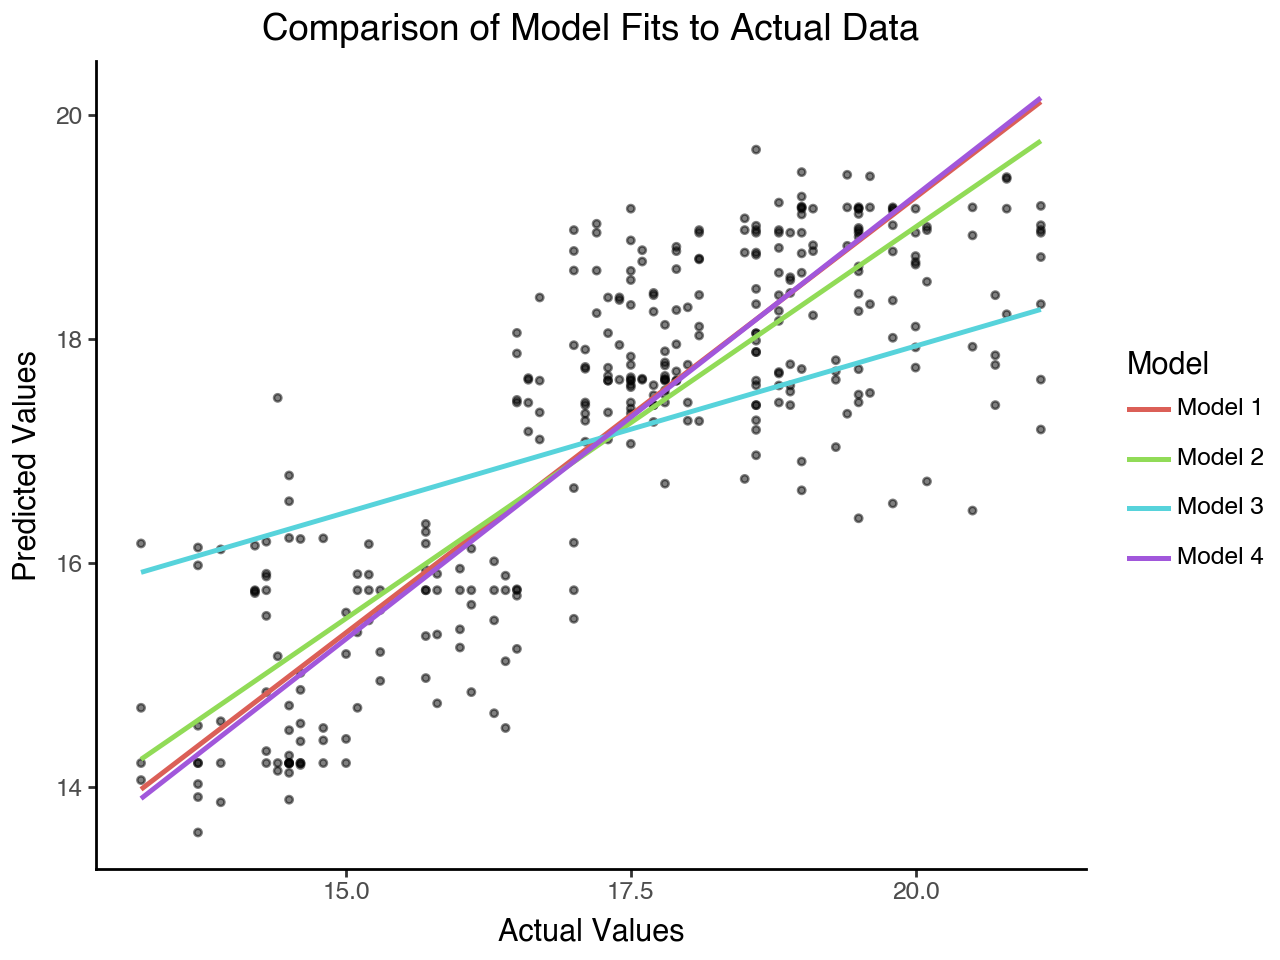

In [158]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, position_dodge, theme_classic, geom_smooth
import pandas as pd
from sklearn.metrics import r2_score

# Prepare the data for plotting
dataframes = []
models = [lr_pipeline_1, lr_pipeline_2, lr_pipeline_3, lr_pipeline_4]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

for i, model in enumerate(models):
    # Fit and predict for each model
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    
    # Create a DataFrame with actual values and predictions from the model
    df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_preds,
        'Model': model_names[i]
    })
    dataframes.append(df)

# Combine all predictions into one DataFrame for plotting
plot_data = pd.concat(dataframes)

# Plot with ggplot
plot_regression = (
    ggplot(plot_data, aes(x='Actual', y='Predicted', color='Model')) +
    geom_point(aes(x='Actual', y='Predicted'), color='black', alpha=0.5, size=1) +
    geom_smooth(aes(color='Model'), method='lm', se=False, linetype="solid") +
    labs(title="Comparison of Model Fits to Actual Data",
         x="Actual Values",
         y="Predicted Values") +
    theme_classic()
)

plot_regression.show()

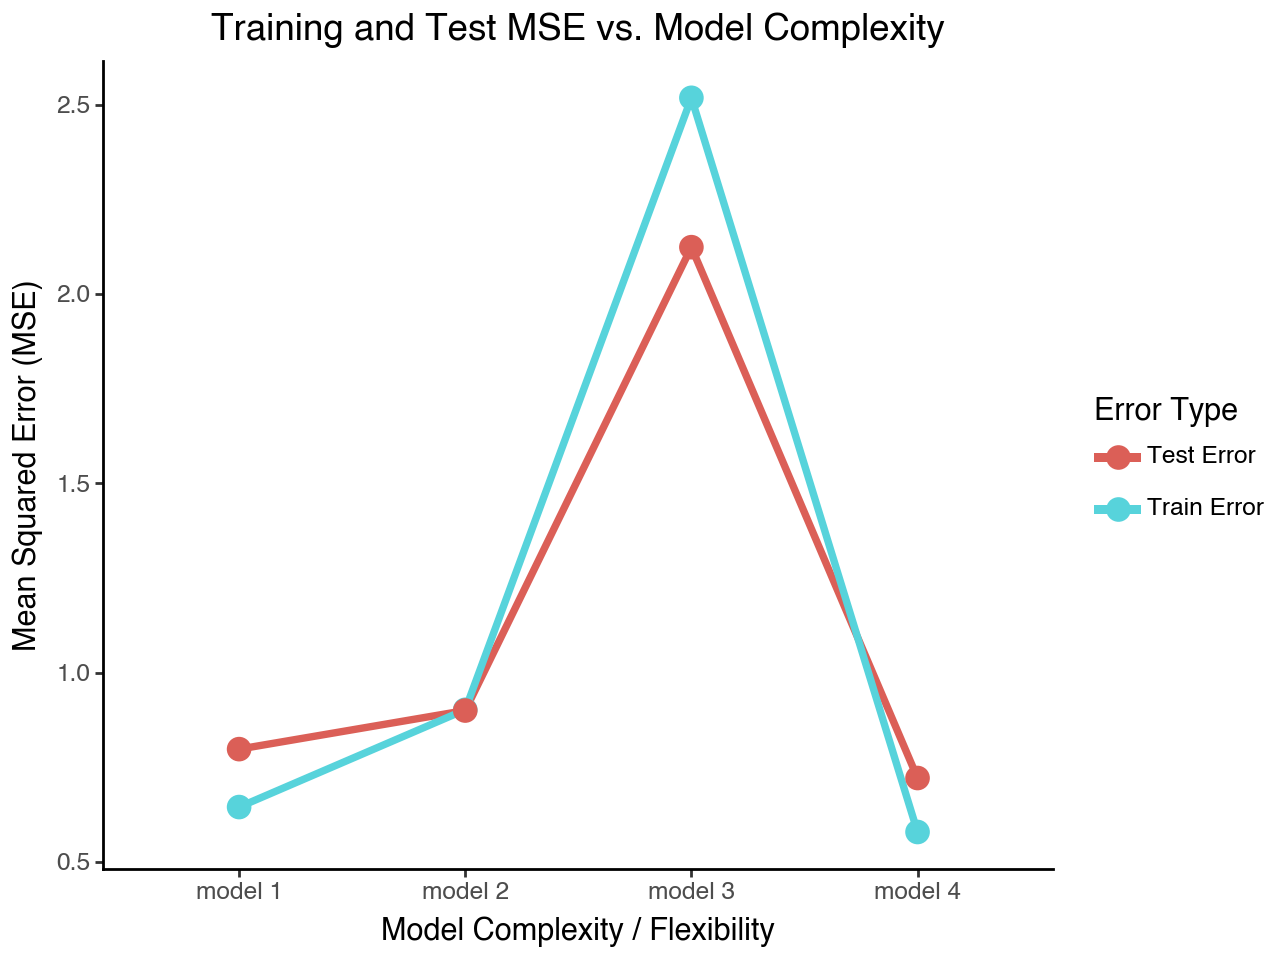

The best model is: model 4 with a test error of: 0.7217


In [167]:
import sklearn as sk
models = [lr_pipeline_1, lr_pipeline_2, lr_pipeline_3, lr_pipeline_4]
model_names = ["model 1", "model 2", "model 3", "model 4"]

# Initialize lists for errors
train_errors = []
test_errors = []

for model_name, model in zip(model_names, models):
    model.fit(X_train, y_train)
    
    # Predict on training data
    train_preds = model.predict(X_train)
    train_mse = sk.metrics.mean_squared_error(y_train, train_preds)
    
    # Predict on test data
    test_preds = model.predict(X_test)
    test_mse = sk.metrics.mean_squared_error(y_test, test_preds)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Prepare data for plotting with ggplot
error_df = pd.DataFrame({
    'Model': model_names,
    'Train Error': train_errors,
    'Test Error': test_errors
})

# Melt the DataFrame for ggplot
error_df_melted = error_df.melt(id_vars='Model', value_vars=['Train Error', 'Test Error'], 
                                  var_name='Error Type', value_name='MSE')

# Create ggplot visualization
plot = (ggplot(error_df_melted, aes(x='Model', y='MSE', color='Error Type', group='Error Type'))
        + geom_line(size=1.5)
        + geom_point(size=4)
        + labs(title='Training and Test MSE vs. Model Complexity',
               x='Model Complexity / Flexibility',
               y='Mean Squared Error (MSE)')
        + theme_classic()
       )

plot.show()

best_model_index = np.argmin(test_errors) 
best_model_name = model_names[best_model_index]
best_model_error = test_errors[best_model_index]  

print(f"The best model is: {best_model_name} with a test error of: {best_model_error:.4f}")

